In [1]:
import sys
import numpy as np
sys.path.append("..")
from fireballpy import Fireball
from ase import Atoms
from ase.visualize import view
from ase.optimize import FIRE
from ase.geometry import distance
import matplotlib.pyplot as plt

atoms = Atoms(symbols=['C', 'H', 'H', 'H', 'H'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       ( -1.6533, -1.6533, -1.6533),
                       (-0.6533, 0.6533, 0.6533),
                       ( 0.6533, -0.6533, 0.6533),
                       ( 0.6533, 0.6533, -0.6533)])

In [2]:
atoms.calc = Fireball(charges_method='mdp', options='molecule', dt=0.2)
opt = FIRE(atoms, trajectory='FIRE.traj', logfile='opt.log')
opt.run(fmax=0.05)

/home/dani/fireballpy/examples/../fireballpy/fireball.py:234: UserWarning: Energies not computed. Computing energies
  warnings.warn(


True

In [3]:
print("steps :",opt.get_number_of_steps(),", dt:",opt.dt)

steps : 43 , dt: 0.02610780105884784


In [4]:
from ase.io.trajectory import Trajectory
traj = Trajectory('FIRE.traj')

In [5]:
ETOT=[]
F=[]
time=[]
for i in range(opt.get_number_of_steps()+1):
    ETOT.append(traj[i].get_total_energy())
    time.append(i*opt.dt)
    f=traj[i].get_forces()
    m=np.sum(np.linalg.norm(f, axis=1))
    F.append(m)

Text(0, 0.5, 'Energy (eV)')

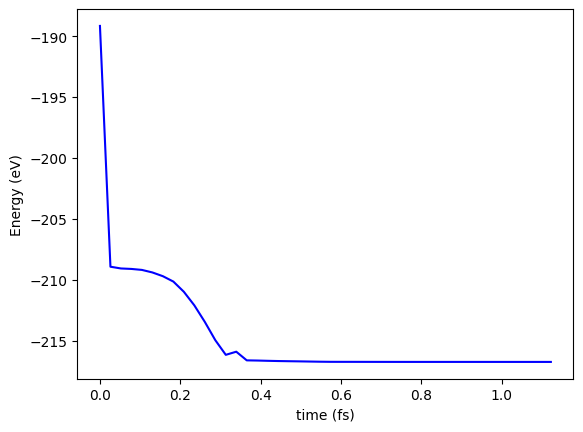

In [6]:
plt.plot(time, ETOT, label='ETOT', color='b')
plt.xlabel('time (fs)')
plt.ylabel('Energy (eV)')

Text(0, 0.5, 'suma_atom(sqrt(fi^2))')

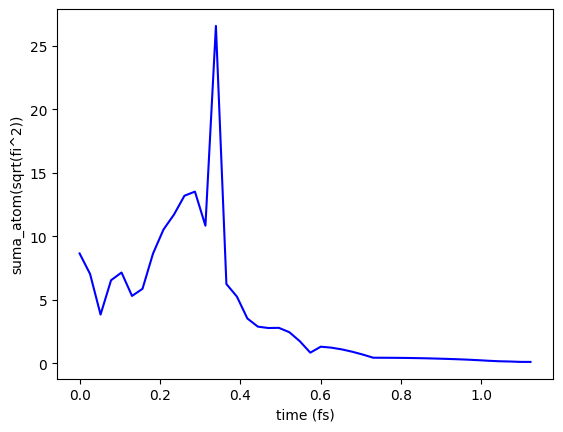

In [7]:
plt.plot(time, F, label='F', color='b')
plt.xlabel('time (fs)')
plt.ylabel('suma_atom(sqrt(fi^2))')

In [8]:
frame = traj[0]

index_atom1 = 0
index_atom2 = 1

pos_atom1 = frame[index_atom1].position
pos_atom2 = frame[index_atom2].position

distance = np.linalg.norm(pos_atom1 - pos_atom2)
print(f"Distancia entre los átomos {index_atom1} y {index_atom2}: {distance} Å")

Distancia entre los átomos 0 y 1: 2.863599600153625 Å


In [9]:
distances = []

index_atom1 = 0
index_atom2 = 1

for index_atom2 in [1,2,3,4]:
    aux=[]
    for frame in traj:
        pos_atom1 = frame[index_atom1].position
        pos_atom2 = frame[index_atom2].position
        d = np.linalg.norm(pos_atom1 - pos_atom2)
        aux.append(d)
    distances.append(aux)

Text(0, 0.5, 'Energy (eV)')

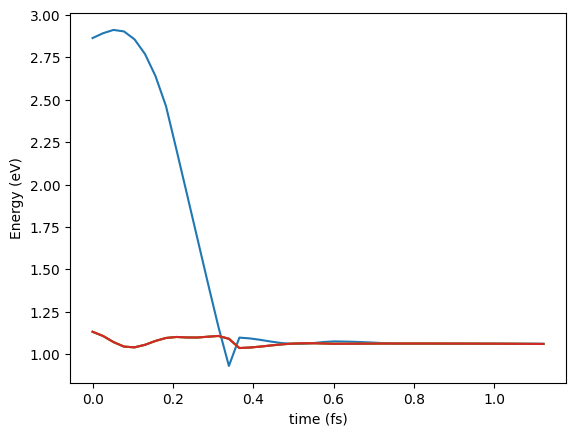

In [10]:
for d in distances:
    plt.plot(time, d)
plt.xlabel('time (fs)')
plt.ylabel('Energy (eV)')

In [11]:
view(traj[0], viewer='x3d')

In [12]:
view(traj[-1], viewer='x3d')